# TRAINING PROCESS

In [ ]:
import DataOperations/dataset
dset=dataset.Dataset("/content/drive/MyDrive/Intercubic","TrainingSet","TestSet","Segmentation")

['/content/drive/MyDrive/Intercubic/TrainingSet/Image', '/content/drive/MyDrive/Intercubic/TestSet/Image']


In [ ]:
dset.importSegmentationClass(False)

In [ ]:
dset.trainingArrayX.shape,dset.testArrayX.shape,dset.trainingArrayY.shape,dset.testArrayY.shape

((1768, 256, 256), (441, 256, 256), (1768, 256, 256, 3), (441, 256, 256, 3))

In [ ]:
dset.trainingArrayX=dset.trainingArrayX.astype('float32')
dset.testArrayX=dset.testArrayX.astype('float32')


In [ ]:
for i in range(len(dset.trainingArrayX)):
  dset.trainingArrayX[i]=dset.trainingArrayX[i]/255.

for i in range(len(dset.testArrayX)):
  dset.testArrayX[i]=dset.testArrayX[i]/255.


In [ ]:
import tensorflow as tf
dset.trainingArrayY=tf.keras.utils.to_categorical(dset.trainingArrayY)
dset.testArrayY=tf.keras.utils.to_categorical(dset.testArrayY)

#VGG16 MODEL CONSTRUCTION

In [ ]:

from keras.applications.vgg16 import VGG16
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense,Dropout, Conv2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt

def vgg16():
    
  conv=VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False)
  conv.output


  x = conv.output
  x = Dropout(0.2)(x)
  x = GlobalAveragePooling2D()(x)


  x = Dense(2048,activation='relu')(x)
  x = Dense(1024,activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1024,activation='relu')(x)
  x = Dense(512,activation='relu')(x)
  
  
  pred = Dense(2,activation='softmax')(x)
  model = Model(inputs = conv.input,outputs=pred)

  model.summary()


  for layer in conv.layers:
      layer.trainable = False
  return model
model=vgg16()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
adam=tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer = adam ,loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.load_weights('/content/drive/MyDrive/mkurtModel/modelAugmented.h5')

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/mkurtModel/modelAugmentedLast.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
history=model.fit(
    dset.trainingArrayX,
    dset.trainingArrayY,
    epochs=50,
    validation_data=(dset.testArrayX,dset.testArrayY),
    verbose=1,
    batch_size=8,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/50
1881/1881 [==============================] - 61s 27ms/step - loss: 0.0217 - accuracy: 0.9920 - false_negatives: 120.0000 - false_positives: 120.0000 - val_loss: 0.4052 - val_accuracy: 0.9115 - val_false_negatives: 88.0000 - val_false_positives: 88.0000
Epoch 2/50
1881/1881 [==============================] - 51s 27ms/step - loss: 0.0231 - accuracy: 0.9923 - false_negatives: 116.0000 - false_positives: 116.0000 - val_loss: 0.3263 - val_accuracy: 0.9115 - val_false_negatives: 88.0000 - val_false_positives: 88.0000
Epoch 3/50
1881/1881 [==============================] - 50s 27ms/step - loss: 0.0222 - accuracy: 0.9921 - false_negatives: 119.0000 - false_positives: 119.0000 - val_loss: 0.2733 - val_accuracy: 0.9286 - val_false_negatives: 71.0000 - val_false_positives: 71.0000
Epoch 4/50
1881/1881 [==============================] - 51s 27ms/step - loss: 0.0241 - accuracy: 0.9914 - false_negatives: 129.0000 - false_positives: 129.0000 - val_loss: 0.2370 - val_accuracy: 0.9416 - val_

In [ ]:
model.evaluate(dset.testArrayX,dset.testArrayY)

32/32 [==============================] - 7s 74ms/step - loss: 0.2312 - accuracy: 0.9457 - true_negatives: 940.0000 - false_positives: 54.0000


[0.2311551570892334, 0.9456740617752075, 940.0, 54.0]

#ACCURACY VISUALIZATION

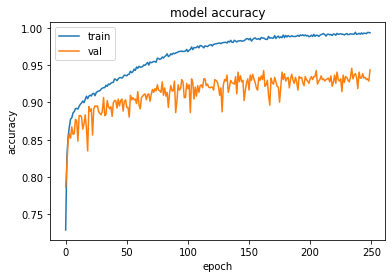

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#TEST

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Adsız klasör/modelvgghighest.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Adsız klasör/modelvgghighest.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open("/content/drive/MyDrive/mkurtModel/modelAugmented.json", 'r')
loaded_modelm = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_modelm)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/mkurtModel/modelAugmented.h5")


In [ ]:
loaded_model.compile()

In [ ]:
model.evaluate(dset.testArrayX,dset.testArrayY)

32/32 [==============================] - 7s 73ms/step - loss: 0.2312 - accuracy: 0.9457 - false_negatives: 54.0000 - false_positives: 54.0000


[0.231155127286911, 0.9456740617752075, 54.0, 54.0]

# UNET MODEL DATA PREPROCESS

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage import io
import cv2
import random

import tensorflow as tf

In [ ]:
dset.trainingArrayX=dset.trainingArrayX.astype('float32')
dset.trainingArrayY=dset.trainingArrayY.astype('float32')
dset.testArrayX=dset.testArrayX.astype('float32')
dset.testArrayY=dset.testArrayY.astype('float32')

In [ ]:

for i in range(len(dset.trainingArrayX)):
  dset.trainingArrayX[i]=dset.trainingArrayX[i]/255.
  dset.trainingArrayY[i]=dset.trainingArrayY[i]/255.
  

In [ ]:
for i in range(len(dset.testArrayX)):
  dset.testArrayX[i]=dset.testArrayX[i]/255.
  dset.testArrayY[i]=dset.testArrayY[i]/255.

In [ ]:
number=0

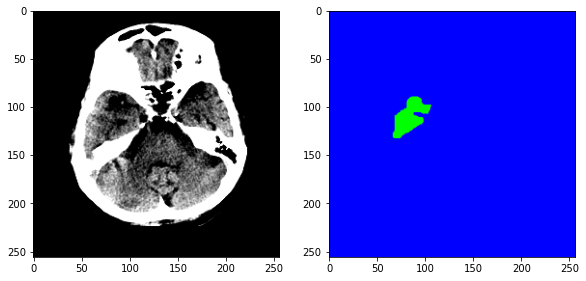

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.imshow(dset.trainingArrayX[number],cmap='gray')
plt.subplot(232)
plt.imshow(dset.trainingArrayY[number])
number+=1

#UNET MODEL CONSTRUCTION

In [ ]:
!pip install -U segmentation-models

     |████████████████████████████████| 50 kB 8.3 MB/s 


In [ ]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
#from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from segmentation_models.losses import cce_jaccard_loss
from segmentation_models.metrics import iou_score

2.6.0
2.6.0


In [ ]:
from tensorflow.keras.layers import Input,Conv2D,Rescaling
from tensorflow.keras import Model
base_model = sm.Unet('densenet201', classes=3, activation='softmax',encoder_weights='imagenet',decoder_use_batchnorm=True)
inp = Input(shape=(None, None, 1))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels

out = base_model(l1)


model = Model(inp, out, name=base_model.name)
#model=base_model

74850304/74836368 [==============================] - 1s 0us/step


#UNET MODEL TRAINING

In [ ]:
model.load_weights('/content/drive/MyDrive/SegmentModelLastDay/sondenemeki.h5')

dice_loss = sm.losses.DiceLoss(class_indexes=np.array([0,1])) 
focal_loss = sm.losses.CategoricalCELoss(class_indexes=np.array([0,1]))
jaccard_loss=sm.losses.JaccardLoss(class_indexes=np.array([0,1]))
total_loss = dice_loss 
adam=tf.keras.optimizers.Adam(learning_rate=0.0001) 
metrics = [sm.metrics.IOUScore(class_indexes=np.array([0,1])),sm.metrics.FScore(threshold=0.5,class_indexes=np.array([0,1]))]
model.compile(optimizer=adam,loss=dice_loss,metrics=metrics)

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/SegmentModelLastDay/sondenemeki.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_iou_score',
    mode='max',
    save_best_only=True,
    save_weights_only=True)


In [ ]:
model.fit(
   x=dset.trainingArrayX,
   y=dset.trainingArrayY,
   batch_size=16,
   epochs=200,
   validation_data=(dset.testArrayX, dset.testArrayY),
   callbacks=[model_checkpoint_callback],
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/dice_loss/Reshape_4:0", shape=(2,), dtype=int64), values=Tensor("gradient_tape/dice_loss/Reshape_3:0", shape=(2, None, 256, 256), dtype=float32), dense_shape=Tensor("gradient_tape/dice_loss/Cast:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


332/332 [==============================] - 91s 201ms/step - loss: 0.8505 - iou_score: 0.0923 - f1-score: 0.2064 - val_loss: 0.7842 - val_iou_score: 0.1371 - val_f1-score: 0.2510
Epoch 2/200
332/332 [==============================] - 60s 179ms/step - loss: 0.7028 - iou_score: 0.2100 - f1-score: 0.3093 - val_loss: 0.6983 - val_iou_score: 0.2149 - val_f1-score: 0.3088
Epoch 3/200
332/332 [==============================] - 60s 180ms/step - loss: 0.5253 - iou_score: 0.3518 - f1-score: 0.5037 - val_loss: 0.4105 - val_iou_score: 0.4356 - val_f1-score: 0.6081
Epoch 4/200
332/332 [==============================] - 60s 180ms/step - loss: 0.2721 - iou_score: 0.5831 - f1-score: 0.7368 - val_loss: 0.2993 - val_iou_score: 0.5530 - val_f1-score: 0.7071
Epoch 5/200
332/332 [==============================] - 60s 180ms/step - loss: 0.2562 - iou_score: 0.6043 - f1-score: 0.7484 - val_loss: 0.2399 - val_iou_score: 0.6276 - val_f1-score: 0.7646
Epoch 6/200
332/332 [==============================] - 60s 180

In [ ]:
for i in range(len(dset.nameArray)):
  img_test = dset.testArrayX[i]
  img_test_input = np.expand_dims(img_test, 0)
  plt.imsave("/content/drive/MyDrive/testFolderm/"+str(dset.nameArray[i]),((model.predict(img_test_input)[0,:,:,:] > 0.5)*255).astype(np.uint8))

#IOU SCORE CALCULATOR

In [ ]:
import SimpleITK as sitk
def loadMask(path):
    reader = sitk.ImageFileReader()
    reader.SetFileName(path)
    sitkMask = reader.Execute();
    mask = sitk.GetArrayFromImage(sitkMask)
    
    return mask

def showGrayScale(mask, title):
    plt.imshow(mask, cmap=plt.cm.gray)
    plt.title(title)
    plt.show()

# 8 bit ve tek kanallı, normal (0), iskemik (1) ve kanama (2) sınıflarından oluşan
# groundTruthMask ve predictedMask'i parametre olarak alip predictedMask'i puanlayan fonksiyon.
# Maskelerin her adımdakı değişiminlerini görmek için showSteps = True.
def calculateIoU(groundTruthMask, predictedMask, showSteps = False):
    
    if showSteps:
        showGrayScale(groundtruthMask, "Ground Truth Maskesi")
        showGrayScale(predictedMask, "Predicted Maskesi")
    
    # 1 ve 2 maskelerini ayrı ayrı oluşturuyoruz (0 ve 255 değerlerinin olduğu birer maske olarak)
    mask1 = np.where(groundtruthMask == 1, 1, 0).astype(np.uint8)
    mask2 = np.where(groundtruthMask == 2, 1, 0).astype(np.uint8)
    

    if showSteps:
        showGrayScale(mask1, "Ground Truth Sınıf 1")
        showGrayScale(mask2, "Ground Truth Sınıf 2")
        

    # İki sınıfı ayrı ayrı dilate ve erode ediyoruz
    kernel = np.ones((3,3))

    erosion1 = cv2.erode(mask1, kernel, iterations=1) 
    dilation1 = cv2.dilate(mask1, kernel, iterations=1)

    erosion2 = cv2.erode(mask2, kernel, iterations=1) 
    dilation2 = cv2.dilate(mask2, kernel, iterations=1)
    
   
    if showSteps:
        showGrayScale(erosion1, "Erode Edilmiş Ground Truth Sınıf 1")
    
    
    # Erode edilmiş ground truth class maskelerini birleştiriyoruz
    erodedGroundtruth = np.zeros(groundtruthMask.shape, dtype = np.uint8)
    erodedGroundtruth[erosion1 == 1] = 1
    erodedGroundtruth[erosion2 == 1] = 2
    
    
    if showSteps:
        showGrayScale(erodedGroundtruth, "Erode Edilmiş Ground Truthların Birleştirilmesi")
    
    
    # Dilate edilmiş ground truth class maskelerini birleştiriyoruz
    dilatedGroundtruth = np.zeros(groundtruthMask.shape, dtype = np.uint8)
    dilatedGroundtruth[dilation1 == 1] = 1
    dilatedGroundtruth[dilation2 == 1] = 2    
    
    
    if showSteps:
        showGrayScale(dilatedGroundtruth, "Dilate Edilmiş Ground Truthların Birleştirilmesi")
    
    
    # Dilate edilmiş ground truth ile kesişim
    intersection = np.where(np.logical_and(dilatedGroundtruth == predictedMask, dilatedGroundtruth != 0), 1, 0)        
    intersectionCount = np.count_nonzero(intersection)

    # Erode edilmiş ground truth ile birleşim
    union = np.where(np.logical_or(erodedGroundtruth != 0, predictedMask != 0), 1, 0)
    unionCount = np.count_nonzero(union)

    score = intersectionCount / unionCount

    
    if showSteps:
        showGrayScale(intersection, "Kesişim")
        showGrayScale(union, "Birleşim")
        print('Kesişim piksel sayısı: ', intersectionCount)
        print('Birleşim piksel sayısı: ', unionCount)
        print('Puan: ', score)
    
    
    return score

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


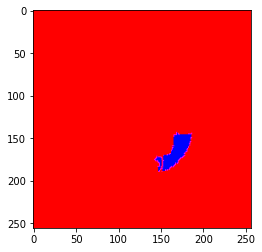

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/Intercubic/TestSet/Annotation/10073.png")
newimage=np.zeros((256,256,3))
newimage[:,:,0]=img1[:,:,0]
newimage[:,:,2]=img1[:,:,1]
newimage[:,:,1]=img1[:,:,2]
plt.imshow(newimage[:,:,:])

In [ ]:

scores=[]

for i in range(len(dset.nameArray)):
    start = time.time()
   
    
    grd=cv2.imread("/content/drive/MyDrive/Intercubic/TestSet/Annotation/"+dset.nameArray[i])
    prd=cv2.imread("/content/drive/MyDrive/testFolderm/"+dset.nameArray[i])
    prdnew=np.zeros((256,256,3))
    prdnew[:,:,0]=prd[:,:,0]
    prdnew[:,:,2]=prd[:,:,1]
    prdnew[:,:,1]=prd[:,:,2]
    grdnew=np.zeros((256,256,3))
    grdnew[:,:,0]=grd[:,:,0]
    grdnew[:,:,2]=grd[:,:,1]
    grdnew[:,:,1]=grd[:,:,2]
    newimage=np.zeros((256,256))
    newimage2=np.zeros((256,256))
    for i in range(256):
      for j in range(256):
        class_labels = np.argmax(prd[i,j], axis=0)
        newimage[i][j]=class_labels
        class_labelsTwo = np.argmax(grd[i,j], axis=0)
        newimage2[i][j]=class_labelsTwo
    predictedMask=newimage
    groundtruthMask=newimage2
    
    iou=calculateIoU(groundtruthMask,predictedMask,False)
    end = time.time()
  
    scores.append(iou)
    print(end - start,iou,sum(scores)/len(scores))

# USAGE OF UNET MODEL WITH REAL CASES


In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.2 MB/s 


In [ ]:
!pip install python-gdcm

     |████████████████████████████████| 9.4 MB 5.3 MB/s 


In [ ]:
from PIL import Image
import numpy as np
from numpy import asarray
import cv2
import tensorflow as tf
import os
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
import pandas as pd
import pydicom

In [ ]:
def contour_crop_resize(image):
      '''
      Contour and crop the image (generally used in brain mri images and object detection)
      :param image: cv2 object
      :param n: if n=0, no cropping, else, cropping exists
      '''
      grayscale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      gaussianBlurred=cv2.GaussianBlur(grayscale,(5,5),0)
      thresholded=cv2.threshold(gaussianBlurred,45,255,cv2.THRESH_BINARY)[1]
      eroded=cv2.erode(thresholded,None,iterations=2)
      dilated=cv2.dilate(eroded,None,iterations=2)

      contouring=cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      contoursGrabbed=imutils.grab_contours(contouring)
      c=max(contoursGrabbed,key=cv2.contourArea)

      extreme_pnts_left=tuple(c[c[:,:,0].argmin()][0])
      extreme_pnts_right=tuple(c[c[:,:,0].argmax()][0])
      extreme_pnts_top=tuple(c[c[:,:,1].argmin()][0])
      extreme_pnts_bot=tuple(c[c[:,:,1].argmax()][0])
    
      new_image=image[extreme_pnts_top[1]:extreme_pnts_bot[1],extreme_pnts_left[0]:extreme_pnts_right[0]]
      returning=np.zeros((256,256,3),dtype=np.uint8)
      returning[extreme_pnts_top[1]:extreme_pnts_bot[1],extreme_pnts_left[0]:extreme_pnts_right[0]]=new_image
      return returning

In [ ]:
import yarismaPngGenerator
pngGen=yarismaPngGenerator.PngGenerator("/content/drive/MyDrive/yarismaOturumiki/DICOM","Segmentation")
pngGen.insertDicomData()
pngGen.getPngData("/content/drive/MyDrive/pngOturumTwo","Data")

In [ ]:
!pip install segmentation_models

In [ ]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
#from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from segmentation_models.losses import cce_jaccard_loss
from segmentation_models.metrics import iou_score

2.6.0
2.6.0


In [ ]:
from tensorflow.keras.layers import Input,Conv2D,Rescaling
from tensorflow.keras import Model
base_model = sm.Unet('densenet201', classes=3, activation='softmax',encoder_weights='imagenet',decoder_use_batchnorm=True)
inp = Input(shape=(None, None, 1))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels

out = base_model(l1)


model = Model(inp, out, name=base_model.name)
#model=base_model

In [ ]:
model.load_weights('/content/drive/MyDrive/SegmentModelLastDay/sondenemeki.h5')

dice_loss = sm.losses.DiceLoss(class_indexes=np.array([0,1])) 
focal_loss = sm.losses.CategoricalCELoss(class_indexes=np.array([0,1]))
jaccard_loss=sm.losses.JaccardLoss(class_indexes=np.array([0,1]))
total_loss = dice_loss 
adam=tf.keras.optimizers.Adam(learning_rate=0.0001) 
metrics = [sm.metrics.IOUScore(class_indexes=np.array([0,1])),sm.metrics.FScore(threshold=0.5,class_indexes=np.array([0,1]))]
model.compile(optimizer=adam,loss=dice_loss,metrics=metrics)

In [ ]:
import imutils
liste=list()

filenamelist=list()
path="/content/drive/MyDrive/pngOturumTwo/Data"
predictions=[]
for subdir,dirs,files in os.walk(path):
  for file in files:
    filePath=subdir+os.sep+file
    img=cv2.imread(filePath)
    img_test = cv2.cvtColor(contour_crop_resize(cv2.resize(img,(256,256),interpolation=cv2.INTER_CUBIC)),cv2.COLOR_BGR2GRAY)
    liste.append(img_test)
    img_test_input = np.expand_dims(img_test,0)
    img_test_input=img_test_input.astype(np.float32)
    img_test_input=img_test_input/255.
    strfile=file
    filenamelist.append(strfile.split(".")[0])
    pred = ((model.predict(img_test_input)[0,:,:,:] > 0.5)*255).astype(np.uint8)
    predictions.append(pred)



In [ ]:
for i in range(len(predictions)):
    print(i)
    prd=cv2.cvtColor(cv2.resize(predictions[i],(512,512),interpolation=cv2.INTER_CUBIC),cv2.COLOR_BGR2RGB)
    newimage=np.zeros((512,512))
    for m in range(512):
      for k in range(512):
        class_labels = np.argmax(prd[m,k], axis=0)
        newimage[m][k]=class_labels
    predictedMask=newimage
    cv2.imwrite("/content/drive/MyDrive/ikinciasamagonderilecek/"+filenamelist[i]+".png",predictedMask)

    
  